In [17]:
import pandas as pd
import numpy as np
import csv
import pickle
from collections import Counter
import matplotlib.pyplot as plt
import powerlaw,math
import os
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.pyplot import MultipleLocator

In [2]:
researcher = pd.read_csv('/Users/yanmemgxing/Desktop/my files/2021/mentor-mentee/Qing Ke/fields/researcher.csv')
mentorship = pd.read_csv('/Users/yanmemgxing/Desktop/my files/2021/mentor-mentee/Qing Ke/fields/mentorship.csv')

In [3]:
files_field = ['chemistry.csv','physics.csv','neuro.csv']

In [4]:
fields_rl = {}
for item in files_field:
    tp = pd.read_csv('./fields/'+item)
    tn = item.split('.')[0]
    fields_rl[tn] = tp

In [5]:
tp = fields_rl['chemistry']
# tp = fields_rl['physics']
# tp = fields_rl['neuro']
print(len(tp))
tp.head(5)

132453


,Unnamed: 0,CID,MenteeID,MentorID,MentorshipType,Institution,InstitutionMAGID,StartYear,StopYear
0,3,6,18761,9,1,"University of California, Berkeley",95457486.0,-1,1984
1,117,130,53604,33687,1,Utrecht University,193662353.0,-1,1997
2,137,151,20,24,2,Baylor College of Medicine,181547552.0,-1,-1
3,147,161,12561,52639,1,"University of Washington, Seattle",201448701.0,1967,1971
4,190,212,188,189,1,Harvard University,136199984.0,-1,1927


##### 为什么选取毕业25年后的招生数作为指标：为什么是25？

1.学生受训时的导师的学术年龄分布

In [6]:
tp1 = pd.DataFrame(tp[(tp.StopYear!=-1)])      # having stopyear
mto = set(tp1['MentorID'])
mmb_BirthYear = {}
for k in mto:
    try:
        by = min(tp1['StopYear'][tp1.MenteeID==k])
        mmb_BirthYear[k] = by
    except:
        a = 'nt'
print(len(mto))
print(len(mmb_BirthYear))

26271
15420


In [7]:
#计算一个三个领域的所有老师的出道年份的csv
mentor_birthYear = []
F_name = ['chemistry','physics','neuro']
for f in F_name:
    print(f)
    tp = fields_rl[f]
    tp1 = pd.DataFrame(tp[(tp.StopYear!=-1)])      # having stopyear
    mto = set(tp1['MentorID'])
    print(len(mto))
    temp = []
    for k in mto:
        try:
            by = min(tp1['StopYear'][tp1.MenteeID==k])
#             mmb_BirthYear[k] = by
            temp1 = [k,by]
            temp.append(temp1)
        except:
            a = 'nt'
    print(len(temp))
    mentor_birthYear.extend(temp)

chemistry
26271
15420
physics
15348
8581
neuro
30093
9203


In [24]:
# mentor_birthYear.to_csv('mentor_birthYear.csv',header=['MentorID','Birthyear'],index=0)

In [8]:
CareerAge_chem = []
for k in mmb_BirthYear:
    my_k = np.array(tp1['StopYear'][tp1.MentorID==k])
    CareerAge_chem.extend(list(my_k - mmb_BirthYear[k]))

In [9]:
CareerAge_phy = []
for k in mmb_BirthYear:
    my_k = np.array(tp1['StopYear'][tp1.MentorID==k])
    CareerAge_phy.extend(list(my_k - mmb_BirthYear[k]))

In [10]:
CareerAge_neuro = []
for k in mmb_BirthYear:
    my_k = np.array(tp1['StopYear'][tp1.MentorID==k])
    CareerAge_neuro.extend(list(my_k - mmb_BirthYear[k]))

In [11]:
CA = [CareerAge_chem,CareerAge_phy,CareerAge_neuro]

In [12]:
mmb_BirthYear_1995 = [k for k in mmb_BirthYear if mmb_BirthYear[k]<=1995]
tp = fields_rl['chemistry']
tp1 = pd.DataFrame(tp[(tp.StopYear!=-1)])      # having stopyear
CareerAge_chem1995 = []
for k in mmb_BirthYear_1995:
    my_k = np.array(tp1['StopYear'][tp1.MentorID==k])
    CareerAge_chem1995.extend(list(my_k - mmb_BirthYear[k]))

In [13]:
mmb_BirthYear_1995 = [k for k in mmb_BirthYear if mmb_BirthYear[k]<=1995]
tp = fields_rl['physics']
tp1 = pd.DataFrame(tp[(tp.StopYear!=-1)])      # having stopyear
CareerAge_phy1995 = []
for k in mmb_BirthYear_1995:
    my_k = np.array(tp1['StopYear'][tp1.MentorID==k])
    CareerAge_phy1995.extend(list(my_k - mmb_BirthYear[k]))

In [14]:
mmb_BirthYear_1995 = [k for k in mmb_BirthYear if mmb_BirthYear[k]<=1995]
tp = fields_rl['neuro']
tp1 = pd.DataFrame(tp[(tp.StopYear!=-1)])      # having stopyear
CareerAge_neuro1995 = []
for k in mmb_BirthYear_1995:
    my_k = np.array(tp1['StopYear'][tp1.MentorID==k])
    CareerAge_neuro1995.extend(list(my_k - mmb_BirthYear[k]))

In [15]:
CA_1995 = [CareerAge_chem1995,CareerAge_phy1995,CareerAge_neuro1995]

<ipython-input-19-116775544d1c>:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('mentoring_age.pdf')
/Users/yanmemgxing/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


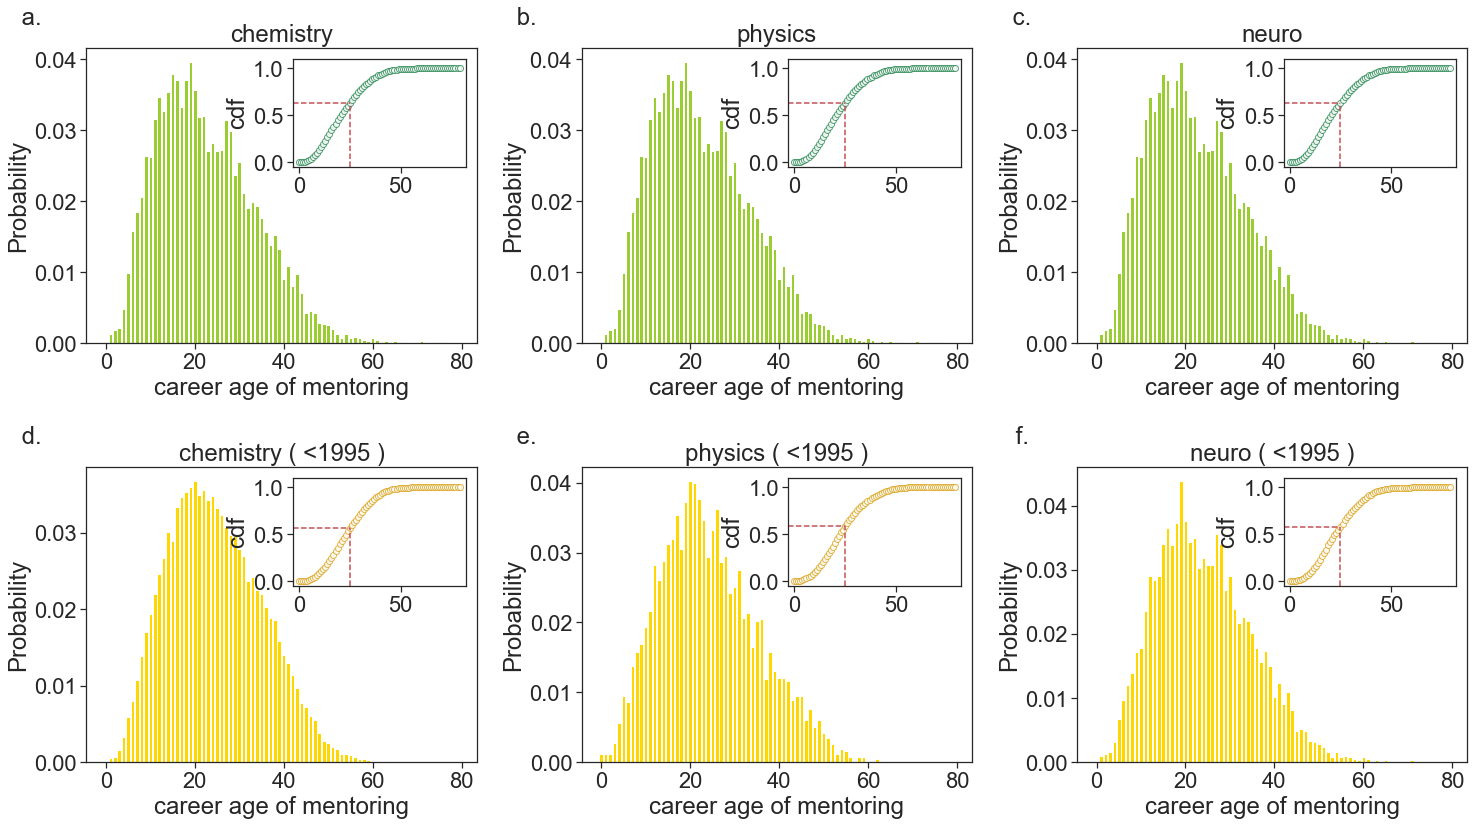

In [19]:
sns.set(style='ticks', font_scale=2, font='Arial')
l_index = [' a. ',' b. ',' c. ',' d. ',' e. ',' f. ',' g. ',' h. ',' i. ',' j. ',' k. ',' l. ']
fig = plt.figure(figsize=(21,12),tight_layout=1)#figsize=(10,3.5)
for i in range(0,3):
    fd = files_field[i].split('.')[0]
    CareerAge = CA[i]
    
    ax = fig.add_subplot(2,3,i+1)
    results, edges = np.histogram(CareerAge, density=1,range=[0,80],bins=80)
    binWidth = edges[1] - edges[0]
    ax.bar(edges[0:-1],results,label='Survival Mentee',color='yellowgreen',alpha=1)
#     legend = ax.legend(loc=(0.85,0.1), bbox_to_anchor=(0.1, 0.1, 6/10, 3/5),
#                borderaxespad=0,edgecolor='white')#prop = legend_properties, 
#     frame = legend.get_frame() 
#     frame.set_alpha(1) 
#     frame.set_facecolor('none') # 设置图例legend背景透明
#     legend.get_frame().set_linewidth(0.0)

    ax.set_xlabel('career age of mentoring')
    ax.set_ylabel('Probability')
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    ax.set_title(fd)
    # ax.grid(True,which="both", ls="-")
    ax.text(-0.14, 1.1,l_index[i],ha='center', va='center', transform=ax.transAxes)

    x0 = edges;y0 = results*binWidth
    Y0 = []
    tp = 0
    for k in y0:
        tp+=k
        Y0.append(tp)
    Y0 = np.array(Y0)
    axins = inset_axes(ax, width=2.4, height=1.5,loc='upper right')
    axins.plot(x0[0:len(x0)-1],Y0,label='Survival Mentee',color='seagreen',marker='o',ls='',
              alpha=0.8,markerfacecolor='white')
    axins.set_ylabel('cdf')
    axins.set_ylim([-0.05,1.1])
    axins.set_xlim([-3,82])
    y_major_locator=MultipleLocator(0.5)
    axins.yaxis.set_major_locator(y_major_locator)
#     axins.set_xlabel('career age of mentoring')
    #画标示线
    axins.plot([25,25],[-0.05,Y0[25]],'--r')
    axins.plot([-3,25],[Y0[25],Y0[25]],'--r')
#     axins
    # axins.set_title('SmallGroup')
    # axins.grid(True,which="both", ls="-")
    # axins.spines['top'].set_visible(False)
    # axins.spines['right'].set_visible(False)
    
    
    
    #第二行的图
    CareerAge = CA_1995[i]
    ax = fig.add_subplot(2,3,i+4)
    results, edges = np.histogram(CareerAge, density=1,range=[0,80],bins=80)
    binWidth = edges[1] - edges[0]
    ax.bar(edges[0:-1],results,label='Survival Mentee',color='gold',alpha=1)
#     legend = ax.legend(loc=(0.85,0.1), bbox_to_anchor=(0.1, 0.1, 6/10, 3/5),
#                borderaxespad=0,edgecolor='white')#prop = legend_properties, 
#     frame = legend.get_frame() 
#     frame.set_alpha(1) 
#     frame.set_facecolor('none') # 设置图例legend背景透明
#     legend.get_frame().set_linewidth(0.0)

    ax.set_xlabel('career age of mentoring')
    ax.set_ylabel('Probability')
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    ax.set_title(fd+' ( <1995 )')
    # ax.grid(True,which="both", ls="-")
    ax.text(-0.14, 1.1,l_index[i+3],ha='center', va='center', transform=ax.transAxes)

    x0 = edges;y0 = results*binWidth
    Y0 = []
    tp = 0
    for k in y0:
        tp+=k
        Y0.append(tp)
    Y0 = np.array(Y0)
    axins = inset_axes(ax, width=2.4, height=1.5,loc='upper right')
    axins.plot(x0[0:len(x0)-1],Y0,label='Survival Mentee',color='goldenrod',marker='o',ls='',
              alpha=0.8,markerfacecolor='white')
    axins.set_ylabel('cdf')
    axins.set_ylim([-0.05,1.1])
    axins.set_xlim([-3,82])
#     axins.set_xlabel('career age of mentoring')
    #画标示线
    axins.plot([25,25],[-0.05,Y0[25]],'--r')
    axins.plot([-3,25],[Y0[25],Y0[25]],'--r')
    y_major_locator=MultipleLocator(0.5)
    axins.yaxis.set_major_locator(y_major_locator)
    
    
fig.savefig('mentoring_age.pdf')

##### correlation coefficient between 25y and overall

In [62]:
#
tp = fields_rl['chemistry']
# tp = fields_rl['physics']
# tp = fields_rl['neuro']
# print(len(tp))
# tp.head(5)
tp1 = pd.DataFrame(tp[(tp.StopYear!=-1)])      # having stopyear
mto = set(tp1['MentorID'])
mmb_BirthYear = {}
for k in mto:
    try:
        by = min(tp1['StopYear'][tp1.MenteeID==k])
        mmb_BirthYear[k] = by
    except:
        a = 'nt'
print(len(mto))
print(len(mmb_BirthYear))

132453


,Unnamed: 0,CID,MenteeID,MentorID,MentorshipType,Institution,InstitutionMAGID,StartYear,StopYear
0,3,6,18761,9,1,"University of California, Berkeley",95457486.0,-1,1984
1,117,130,53604,33687,1,Utrecht University,193662353.0,-1,1997
2,137,151,20,24,2,Baylor College of Medicine,181547552.0,-1,-1
3,147,161,12561,52639,1,"University of Washington, Seattle",201448701.0,1967,1971
4,190,212,188,189,1,Harvard University,136199984.0,-1,1927


In [25]:
mentor_birthYear.head(2)

,0,1
0,655362,1968
1,786438,1941


In [27]:
from scipy.stats import pearsonr
# pccs = pearsonr(x, y)

In [41]:
F_name = ['chemistry','physics','neuro']
for f in F_name:
    tp = fields_rl[f]
    tp1 = pd.DataFrame(tp[(tp.StopYear!=-1)])      # having stopyear
    mto = set(tp1['MentorID'])
    l_all = []
    l_25 = []
    for k in mto:
        try:
            m_by = list(mentor_birthYear[1][mentor_birthYear[0]==k])
#             print(m_by)
            m_by = m_by[0]
            if m_by<=1985:
                mte_all = np.array(tp1['StopYear'][tp1.MentorID==k]) - m_by
                mte_25 = mte_all[mte_all<=25]
                l_all.append(len(mte_all))
                l_25.append(len(mte_25))
            else:
                a = 'nt'
        except:
            a = 'nt'
    print(len(l_all))
    print(f,pearsonr(l_all, l_25))

10304
chemistry (0.8048961475508247, 0.0)
6341
physics (0.8112419345875687, 0.0)
4664
neuro (0.8184578168249733, 0.0)


In [40]:
print(f,pearsonr(l_all, l_25))

neuro (0.31185114480605336, 9.985836164971158e-106)


In [ ]:
#计算时间相对较长一点点
#补充每位学生的毕业后30年内的学生数
tp_l = []
count = 0
for i in range(len(mentee_np)):
    print(count)
#     mto = mentor_np[i]                            #老师
    mte = mentee_np[i]                              #学生
    yy = StopYear_np[i]                             #受训年份
    mteyear_of_mte = StopYear_np[mentor_np==mte]    #该学生的学生的受训时间
    if len(mteyear_of_mte)==0:
        tp_l.append(0)
    else:
        tp_t = mteyear_of_mte - yy
#         tp_t1 = tp_t[tp_t<=20]                      #毕业20年后的招生数
        tp_t1 = tp_t[tp_t<=25]                      #毕业25年后的招生数        
        tp_l.append(len(tp_t1))
    count+=1
neuro['NumOfMenteesOfTheMenteeIn20'] = tp_l